In [41]:
library(tidyverse)
library(reshape2)
library(RColorBrewer)
library(viridis)

In [40]:
save_dir = '../data/processed/fig2_hichip/'


# 1. Loop width plots

In [3]:
# takes awhile to load
loop_width = read.csv(paste0(save_dir, 'loop_width_normal_df.csv'))
dim(loop_width)

[1] 25300784        3

In [7]:
# takes awhile
loop_width = loop_width %>% 
     group_by(tissue) %>% 
     arrange(loop_width) %>% 
     mutate(rn = row_number())

In [8]:
head(loop_width)

X,loop_width,tissue,rn
<int>,<int>,<fct>,<int>
138223,0,Astrocytes,1
143477,0,Astrocytes,2
226708,0,Astrocytes,3
287637,0,Astrocytes,4
290009,0,Astrocytes,5
292901,0,Astrocytes,6


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Saving 7 x 7 in image

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



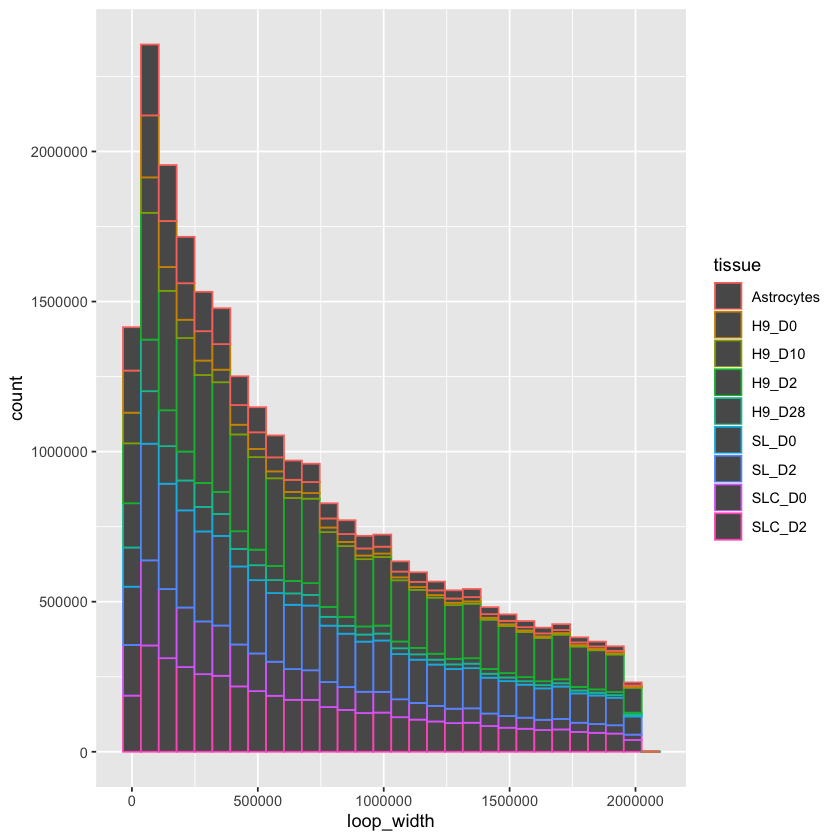

In [15]:
ggplot(loop_width, aes(x=loop_width, colour = tissue))+geom_histogram()
ggsave(paste0(save_dir, 'loop_width_hist.pdf'))

Saving 7 x 7 in image



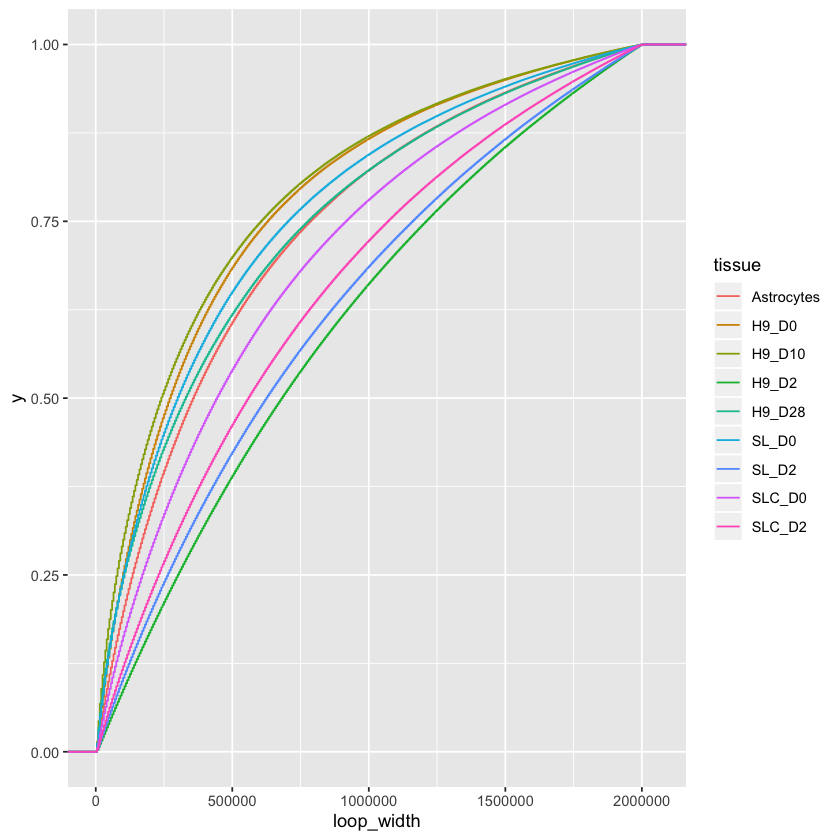

In [14]:
# takes awhile
ggplot(loop_width, aes(x=loop_width, colour = tissue)) + stat_ecdf() + 
ggsave(paste0(save_dir, 'loop_width.pdf'))

In [9]:
# # takes awhile
# ggplot(loop_width ) + 
#   geom_step(aes(x=loop_width, y=rn, color=tissue))

In [ ]:
# ggplot(data=loop_width, aes(x=loop_width,color=tissue)) +  geom_step(aes(y=..y.. * ..count..),stat="ecdf")


In [ ]:
# ggplot(data=loop_width, aes(x=loop_width,color=tissue)) + 
#       geom_bar(aes(y=loop_width,fill="loop_width"), width=.7, stat="identity") +
#       geom_line(aes(y=CumulativeSales,group=1,linetype="Cumulative sales"))+
#       geom_point(aes(y=CumulativeSales))+
#       xlab("Stores") + ylab("Sales") +
#       labs(fill="",linetype="")+
#       theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust=0.5)) +
#       scale_x_discrete(limits=data[,1])

# 2. Unique /common loops

In [16]:
all_counts_results_df = read.csv(paste0(save_dir, 'all_counts_results_df.csv'))


In [18]:
all_counts_results_df
dim(all_counts_results_df)

tissue,num_loops,num_unique_loops,num_common_loops,num_anchors,num_unique_anchors,num_common_anchors
<fct>,<int>,<int>,<int>,<int>,<int>,<int>
Astrocytes,1839205,237390,41329,322550,1101,103354
H9_D0,1318716,131617,41329,306851,636,103354
H9_D10,712533,58580,41329,230431,254,103354
H9_D2,6720106,1705295,41329,461684,5491,103354
H9_D28,1256959,201603,41329,345113,5206,103354
SLC_D0,2659082,387454,41329,348166,840,103354
SLC_D2,4282155,613016,41329,438625,2725,103354
SL_D0,1187599,101434,41329,297076,403,103354
SL_D2,5324429,1002262,41329,460761,5266,103354


[1] 9 7

In [36]:
all_counts_results_df$shared2 = all_counts_results_df$num_loops - all_counts_results_df$num_unique_loops - all_counts_results_df$num_common_loops
all_counts_results_df$unique_perc = all_counts_results_df$num_unique_loops/ all_counts_results_df$num_loops 
all_counts_results_df$shared2_perc = all_counts_results_df$shared2/ all_counts_results_df$num_loops 
all_counts_results_df$common_perc = all_counts_results_df$num_common_loops/ all_counts_results_df$num_loops 


In [37]:
all_counts_results_df_long = melt(all_counts_results_df[,c("tissue","unique_perc","shared2_perc", "common_perc")])
head(all_counts_results_df_long)


Using tissue as id variables



,tissue,variable,value
,<fct>,<fct>,<dbl>
1,Astrocytes,unique_perc,0.12907207
2,H9_D0,unique_perc,0.09980693
3,H9_D10,unique_perc,0.08221374
4,H9_D2,unique_perc,0.25376013
5,H9_D28,unique_perc,0.16038948
6,SLC_D0,unique_perc,0.14570968


Saving 7 x 7 in image



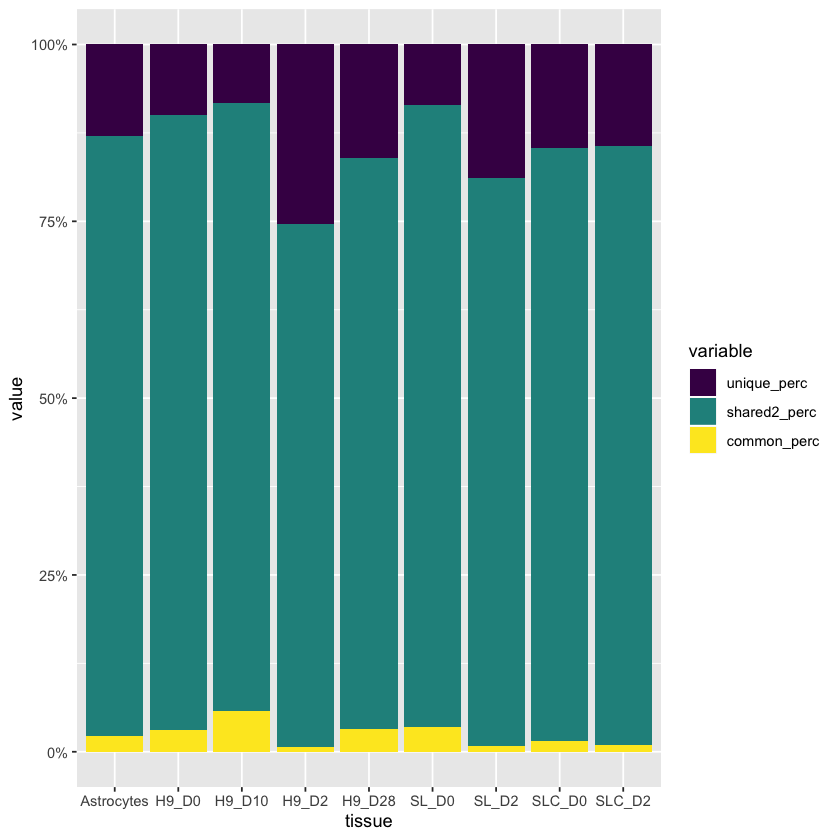

In [53]:
p = ggplot(all_counts_results_df_long, aes(x=tissue, fill=variable,y=value))+geom_bar(stat="identity")+
scale_y_continuous(labels = scales::percent_format())
p + scale_fill_viridis_d()

ggsave(paste0(save_dir, 'all_counts_results_df.pdf'))

# 3A. P-P, E-P, E-E

In [57]:
perc_accessible = read.csv(paste0(save_dir, 'perc_anchor_accessible_df_updated.csv'))
perc_accessible

X,num_anchor,perc_anchor_P_or_PIRacc,perc_anchor_accessible,perc_anchor_promoter,perc_anchor_PIRacc,empty1,num_loop,perc_both_anchor_acc,perc_one_anchor_acc,perc_is_P_P,perc_is_P_PIR,perc_is_PIR_PIR,perc_is_P_PIRacc,perc_is_PIRacc_PIRacc,empty2,num_loops_considered,perc_is_P_P_adj,perc_is_P_PIRacc_adj,perc_is_PIR_PIRacc_adj
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<int>,<dbl>,<dbl>,<dbl>
Astrocytes,322550,0.1471462,0.05046039,0.10667803,0.04046814,NA,1839205,0.015881862,0.1794444,0.1257174,0.8742826,0,0.08454794,0,NA,386721,0.5978987,0.4021013,0
H9_D0,306851,0.2059599,0.11048033,0.11429652,0.09166338,NA,1318716,0.034560133,0.2653179,0.1418994,0.8581006,0,0.13123372,0,NA,360185,0.5195247,0.4804753,0
H9_D10,230431,0.2049985,0.08532706,0.13629677,0.06870169,NA,712533,0.030627353,0.2346923,0.1547844,0.8452156,0,0.11978533,0,NA,195640,0.5637344,0.4362656,0
H9_D2,461684,0.1803333,0.10394122,0.08899160,0.09134170,NA,6720106,0.017613710,0.2138675,0.1086358,0.8913642,0,0.10318483,0,NA,1423457,0.5128669,0.4871331,0
H9_D28,345113,0.1618600,0.04491283,0.12641077,0.03544926,NA,1256959,0.009152248,0.1304800,0.1373983,0.8626017,0,0.06073786,0,NA,249049,0.6934539,0.3065461,0
SLC_D0,348166,0.2259669,0.14066853,0.10639178,0.11957515,NA,2659082,0.055945999,0.3280583,0.1381447,0.8618553,0,0.17720176,0,NA,838532,0.4380727,0.5619273,0
SLC_D2,438625,0.2137566,0.14011513,0.09095469,0.12280194,NA,4282155,0.037083431,0.2778769,0.1105208,0.8894792,0,0.15178432,0,NA,1123231,0.4213443,0.5786557,0
SL_D0,297076,0.2357814,0.14238781,0.11549233,0.12028908,NA,1187599,0.052260064,0.3141027,0.1407108,0.8592892,0,0.17104848,0,NA,370245,0.4513444,0.5486556,0
SL_D2,460761,0.1890199,0.11479270,0.08895067,0.10006923,NA,5324429,0.024244478,0.2362475,0.1063968,0.8936032,0,0.12076807,0,NA,1209523,0.4683681,0.5316319,0


In [58]:
perc_long = melt(perc_accessible[,c("X","perc_is_P_P", "perc_is_P_PIR")])
head(perc_long)


Using X as id variables



,X,variable,value
,<fct>,<fct>,<dbl>
1,Astrocytes,perc_is_P_P,0.1257174
2,H9_D0,perc_is_P_P,0.1418994
3,H9_D10,perc_is_P_P,0.1547844
4,H9_D2,perc_is_P_P,0.1086358
5,H9_D28,perc_is_P_P,0.1373983
6,SLC_D0,perc_is_P_P,0.1381447


Saving 7 x 7 in image



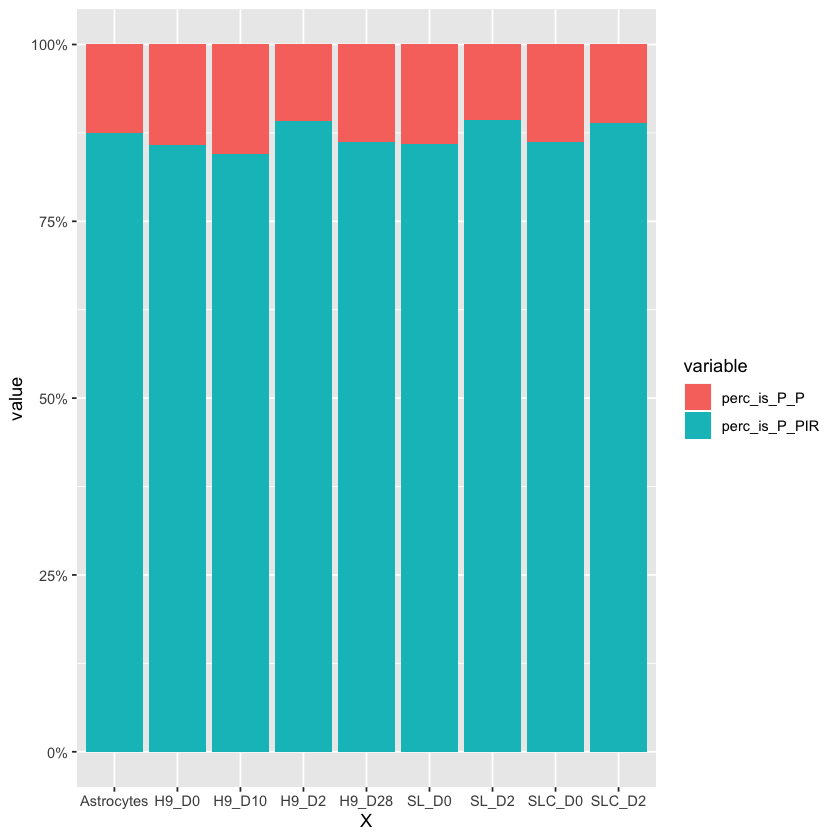

In [62]:
p = ggplot(perc_long, aes(x=X, fill=variable,y=value))+geom_bar(stat="identity")+
scale_y_continuous(labels = scales::percent_format())
p
ggsave(paste0(save_dir, 'P_PIR.pdf'))

In [59]:
perc_long_adj = melt(perc_accessible[,c("X","perc_is_P_P_adj", "perc_is_P_PIRacc_adj")])
head(perc_long_adj)


Using X as id variables



,X,variable,value
,<fct>,<fct>,<dbl>
1,Astrocytes,perc_is_P_P_adj,0.5978987
2,H9_D0,perc_is_P_P_adj,0.5195247
3,H9_D10,perc_is_P_P_adj,0.5637344
4,H9_D2,perc_is_P_P_adj,0.5128669
5,H9_D28,perc_is_P_P_adj,0.6934539
6,SLC_D0,perc_is_P_P_adj,0.4380727


Saving 7 x 7 in image



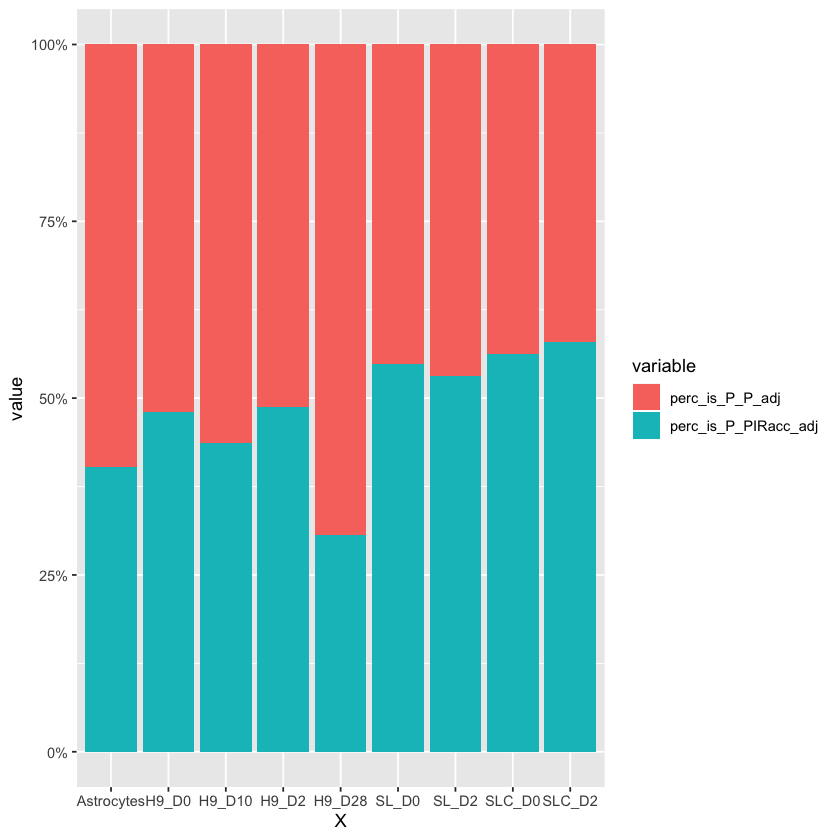

In [63]:
p = ggplot(perc_long_adj, aes(x=X, fill=variable,y=value))+geom_bar(stat="identity")+
scale_y_continuous(labels = scales::percent_format())
p
ggsave(paste0(save_dir, 'P_PIR_acc_adj.pdf'))

# 3B: replicate Song 4C, figure out
figure out counts for the types as outlined by Song, et al fig 4b/c ish Types (enhancer = has atac region)

- I. Enhancer interacts with distal gene(s) only
- II. Enhancer interacts with nearest and distal gene(s)
- III. Enhancer interacts with nearest gene only
- IV. Enhancer cannot be resolved for interactions with nearest genem

In [64]:
gene_class = read.csv(paste0(save_dir, 'P_PIR_gene_classification_df.csv'))
gene_class

X,num_loops_P_PIRacc,num_enhancers_in_P_PIRacc,numE_type1_distal_only_in_P_PIRacc,numE_type2_nearest_distal_in_P_PIRacc,numE_type3_nearest_only_in_P_PIRacc,num_target_genes_in_P_PIRacc,numP_type1_distal_only,numP_type2_nearest_distal,numP_type3_nearest_only,num_loops_Pacc_PIRacc,num_enhancers_in_Pacc_PIRacc,numE_type1_distal_only_in_Pacc_PIRacc,numE_type2_nearest_distal_in_Pacc_PIRacc,numE_type3_nearest_only_in_Pacc_PIRacc,num_target_genes_in_Pacc_PIRacc,numP_type1_distal_only_Pacc,numP_type2_nearest_distal_Pacc,numP_type3_nearest_only_Pacc
<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Astrocytes,241235,15137,3188,11866,83,241235,40944,200208,83,37355,8855,7797,866,192,37355,30620,6543,192
H9_D0,255247,30791,9647,19873,1271,255247,54057,199919,1271,55020,15984,12438,2543,1003,55020,38942,15075,1003
H9_D10,133816,18146,6292,11013,841,133816,32460,100515,841,27618,8138,6732,1033,373,27618,20830,6415,373
H9_D2,950434,45106,7522,37039,545,950434,138973,810916,545,143820,32851,27353,4215,1283,143820,113987,28550,1283
H9_D28,122050,14443,4378,9633,432,122050,26630,94988,432,14646,5156,4377,547,232,14646,11620,2794,232
SLC_D0,672211,44888,11348,32717,823,672211,111826,559562,823,175823,32067,24833,6066,1168,175823,122225,52430,1168
SLC_D2,886043,57243,12612,43718,913,886043,145400,739730,913,188033,41116,32180,7095,1841,188033,135294,50898,1841
SL_D0,292572,38730,13888,23079,1763,292572,72384,218425,1763,74057,21843,16760,3648,1435,74057,51317,21305,1435
SL_D2,882508,49343,9478,39199,666,882508,141756,740086,666,155846,35160,28626,5103,1431,155846,118428,35987,1431


In [69]:
colnames(gene_class)

[1] "X"                                       
 [2] "num_loops_P_PIRacc"                      
 [3] "num_enhancers_in_P_PIRacc"               
 [4] "numE_type1_distal_only_in_P_PIRacc"      
 [5] "numE_type2_nearest_distal_in_P_PIRacc"   
 [6] "numE_type3_nearest_only_in_P_PIRacc"     
 [7] "num_target_genes_in_P_PIRacc"            
 [8] "numP_type1_distal_only"                  
 [9] "numP_type2_nearest_distal"               
[10] "numP_type3_nearest_only"                 
[11] "num_loops_Pacc_PIRacc"                   
[12] "num_enhancers_in_Pacc_PIRacc"            
[13] "numE_type1_distal_only_in_Pacc_PIRacc"   
[14] "numE_type2_nearest_distal_in_Pacc_PIRacc"
[15] "numE_type3_nearest_only_in_Pacc_PIRacc"  
[16] "num_target_genes_in_Pacc_PIRacc"         
[17] "numP_type1_distal_only_Pacc"             
[18] "numP_type2_nearest_distal_Pacc"          
[19] "numP_type3_nearest_only_Pacc"

In [75]:
gene_class_long = melt(gene_class[,c("X","numE_type1_distal_only_in_P_PIRacc", "numE_type2_nearest_distal_in_P_PIRacc", "numE_type3_nearest_only_in_P_PIRacc",
                                      "numP_type1_distal_only", "numP_type2_nearest_distal", "numP_type3_nearest_only")])
gene_class_long = separate(gene_class_long, variable, into = c("kind", "type", "info1", "info2", "in", "P", "PIRacc"), sep="_", remove = FALSE)  
head(gene_class_long)

Using X as id variables

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 27 rows [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, ...].”


,X,variable,kind,type,info1,info2,in,P,PIRacc,value
,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,Astrocytes,numE_type1_distal_only_in_P_PIRacc,numE,type1,distal,only,in,P,PIRacc,3188
2,H9_D0,numE_type1_distal_only_in_P_PIRacc,numE,type1,distal,only,in,P,PIRacc,9647
3,H9_D10,numE_type1_distal_only_in_P_PIRacc,numE,type1,distal,only,in,P,PIRacc,6292
4,H9_D2,numE_type1_distal_only_in_P_PIRacc,numE,type1,distal,only,in,P,PIRacc,7522
5,H9_D28,numE_type1_distal_only_in_P_PIRacc,numE,type1,distal,only,in,P,PIRacc,4378
6,SLC_D0,numE_type1_distal_only_in_P_PIRacc,numE,type1,distal,only,in,P,PIRacc,11348


In [78]:
gene_class_long_sum = gene_class_long%>%
    group_by(kind, type)%>%
    summarise(value_sum = sum(value))
gene_class_long_sum

kind,type,value_sum
<chr>,<chr>,<int>
numE,type1,78353
numE,type2,228137
numE,type3,7337
numP,type1,764430
numP,type2,3664349
numP,type3,7337


Saving 7 x 7 in image



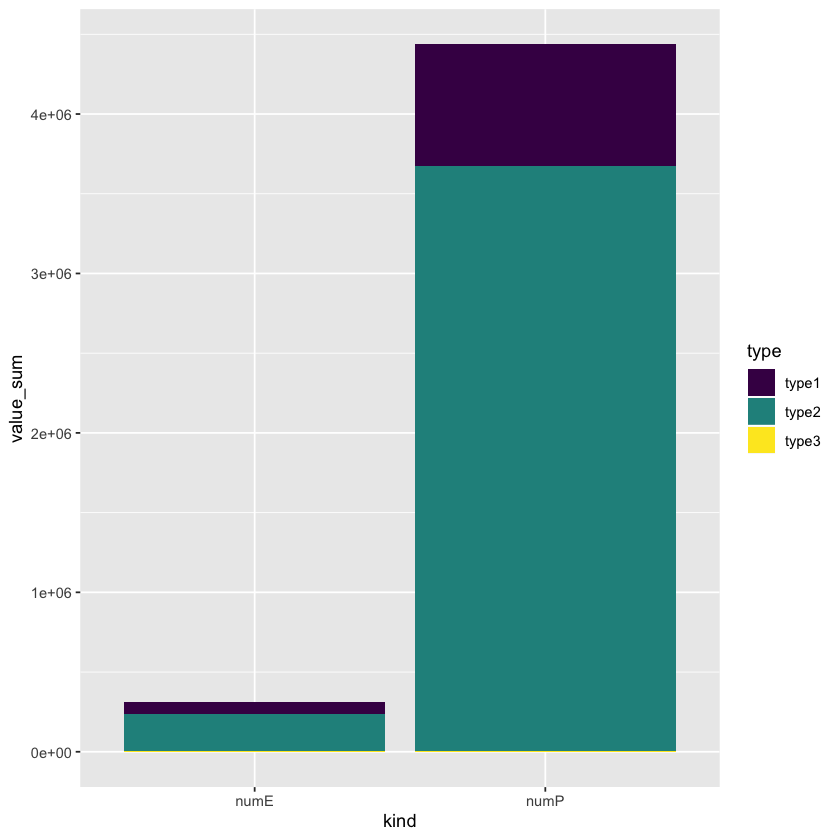

In [82]:
p = ggplot(gene_class_long_sum,aes(x=kind, fill=type, y=value_sum))+geom_bar(stat="identity")
p + scale_fill_viridis_d()
ggsave(paste0(save_dir, 'gene_class_all.pdf'))

In [83]:
gene_class_long_adj = melt(gene_class[,c("X","numE_type1_distal_only_in_Pacc_PIRacc", "numE_type2_nearest_distal_in_Pacc_PIRacc", "numE_type3_nearest_only_in_Pacc_PIRacc",
                                      "numP_type1_distal_only_Pacc", "numP_type2_nearest_distal_Pacc", "numP_type3_nearest_only_Pacc")])
gene_class_long_adj = separate(gene_class_long_adj, variable, into = c("kind", "type", "info1", "info2", "in", "P", "PIRacc"), sep="_", remove = FALSE)  
head(gene_class_long_adj)

Using X as id variables

Warning message:
“Expected 7 pieces. Missing pieces filled with `NA` in 27 rows [28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, ...].”


,X,variable,kind,type,info1,info2,in,P,PIRacc,value
,<fct>,<fct>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>
1,Astrocytes,numE_type1_distal_only_in_Pacc_PIRacc,numE,type1,distal,only,in,Pacc,PIRacc,7797
2,H9_D0,numE_type1_distal_only_in_Pacc_PIRacc,numE,type1,distal,only,in,Pacc,PIRacc,12438
3,H9_D10,numE_type1_distal_only_in_Pacc_PIRacc,numE,type1,distal,only,in,Pacc,PIRacc,6732
4,H9_D2,numE_type1_distal_only_in_Pacc_PIRacc,numE,type1,distal,only,in,Pacc,PIRacc,27353
5,H9_D28,numE_type1_distal_only_in_Pacc_PIRacc,numE,type1,distal,only,in,Pacc,PIRacc,4377
6,SLC_D0,numE_type1_distal_only_in_Pacc_PIRacc,numE,type1,distal,only,in,Pacc,PIRacc,24833


In [85]:
gene_class_long_adj_sum = gene_class_long_adj%>%
    group_by(kind, type)%>%
    summarise(value_sum = sum(value))
gene_class_long_adj_sum

kind,type,value_sum
<chr>,<chr>,<int>
numE,type1,161096
numE,type2,31116
numE,type3,8958
numP,type1,643263
numP,type2,219997
numP,type3,8958


Saving 7 x 7 in image



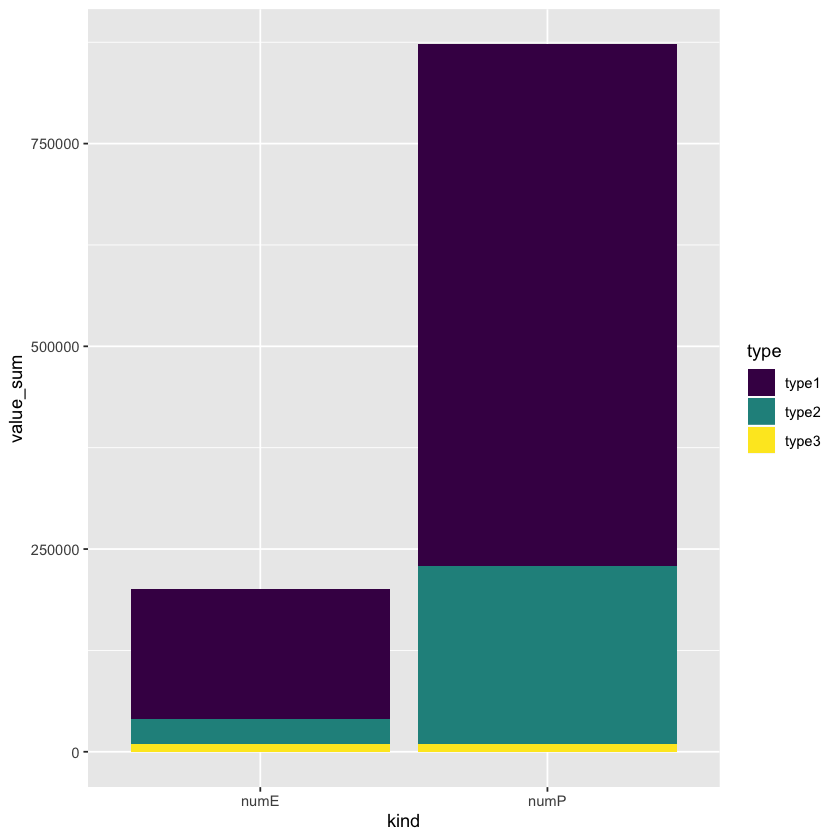

In [86]:
p = ggplot(gene_class_long_adj_sum,aes(x=kind, fill=type, y=value_sum))+geom_bar(stat="identity")
p + scale_fill_viridis_d()
ggsave(paste0(save_dir, 'gene_class_adj_all.pdf'))